In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing

sns.set(style="darkgrid")

np.random.seed(20)

## Data preparation

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.shape

(39644, 61)

In [4]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
df.rename(columns=lambda x: x.strip(), inplace=True)

We can notice that there are already some one-hot-encoded features such as 'weekday_is...' and 'data_channel_is...'.

In [6]:
df.columns[:5]

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens'],
      dtype='object')

In [7]:
df[df.isna().any(axis=1)]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


In [8]:
df.drop_duplicates()
df.shape

(39644, 61)

In [9]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [10]:
df.select_dtypes(include = 'object').columns

Index(['url'], dtype='object')

In [11]:
df = df.drop('url', axis = 1)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In Data Preparation section we analyzed that our dataset has no missing values, no duplicates. Nevertheless we slightly change the names of the dataset's columns, removing the unnecessary spaces at the beginning.

We had only one column of type 'object', which was url, and we deleted it because it doesn't contain any useful information for further analysis due to its uniqueness for each value.

##Exploratory data analysis

*Density distribution*

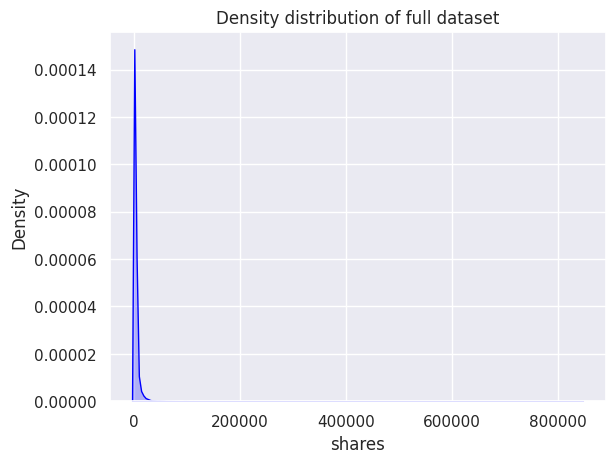

In [13]:
sns.kdeplot(df['shares'], color='blue', fill=True)
plt.title('Density distribution of full dataset');

We can notice that most of the values are not higher than 15 000. So, lets filter out the articles to make graphics more convenient for visual perception

In [14]:
df_filter = df[df['shares'] < 15000]
df_filter.shape

(38360, 60)

In [15]:
df.shape[0] - df_filter.shape[0]

1284

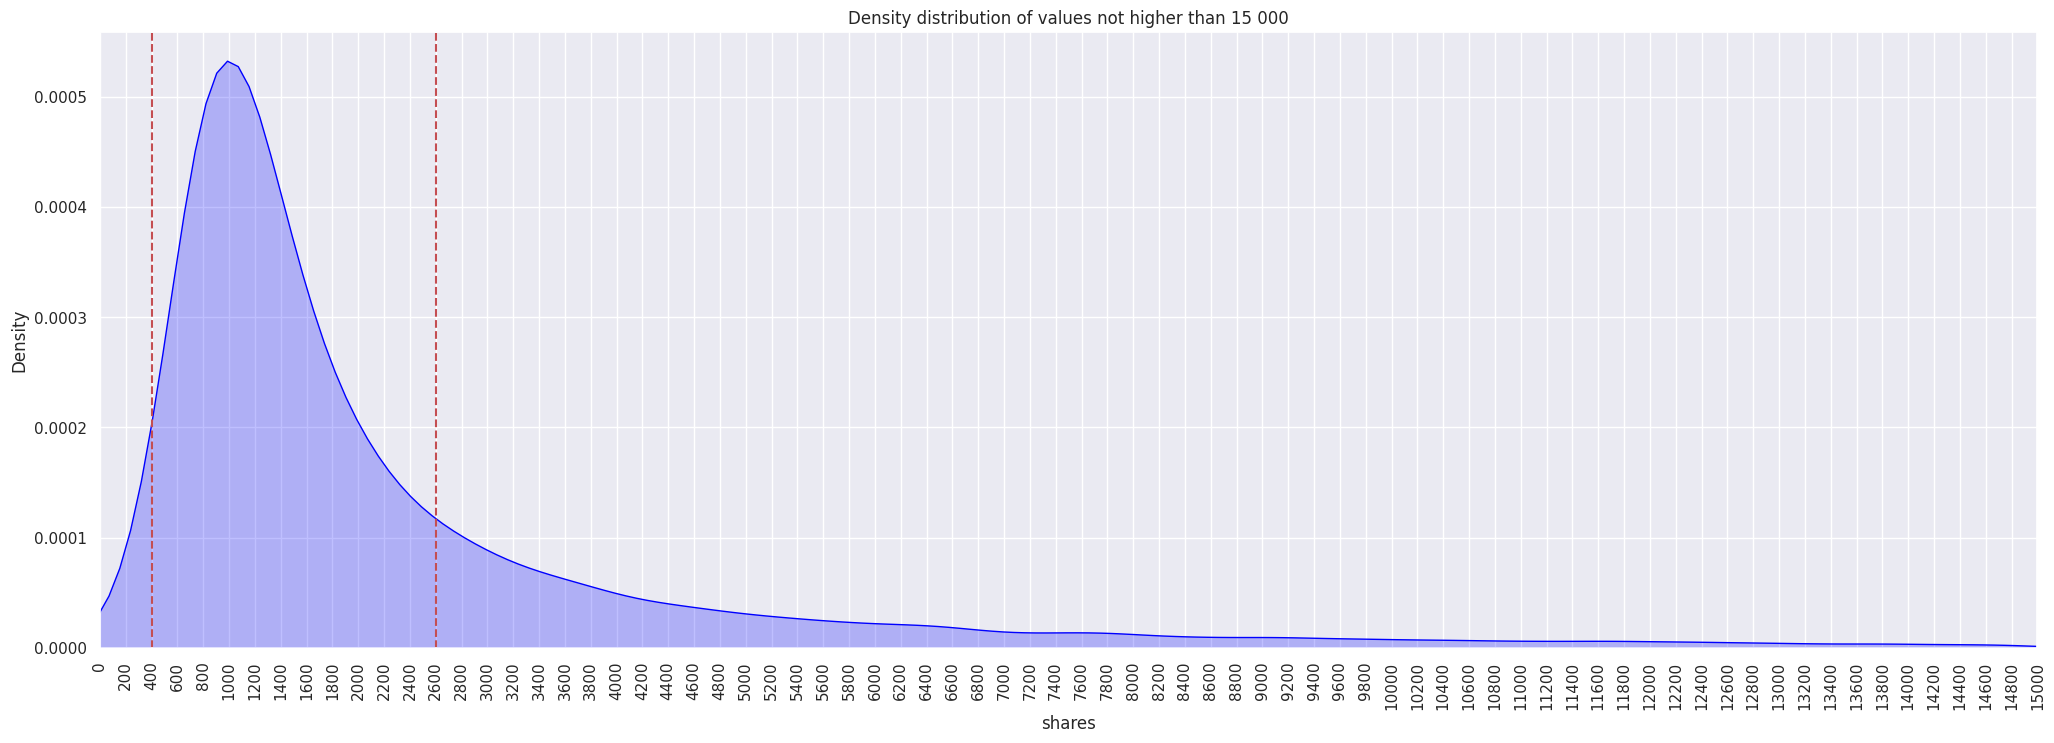

In [16]:
plt.figure(figsize = (25, 8))
sns.kdeplot(df_filter['shares'], color='blue', fill=True)
plt.xticks(range(0, 15001, 200))
plt.xticks(rotation=90)
plt.xlim(0, 15000)
plt.title('Density distribution of values not higher than 15 000')
plt.axvline(400, c ='r', linestyle = 'dashed')
plt.axvline(2600, c ='r', linestyle = 'dashed');

The graphs above represent the density distribution of shares in our dataset.

As the both of graphs show the biggest part of values is between around 400 and 2600.

Also an important fact that there is a noticable share of data with values higher than 15 000. In this research we consider them as anomalies, not outliners.

*Weekday influence*

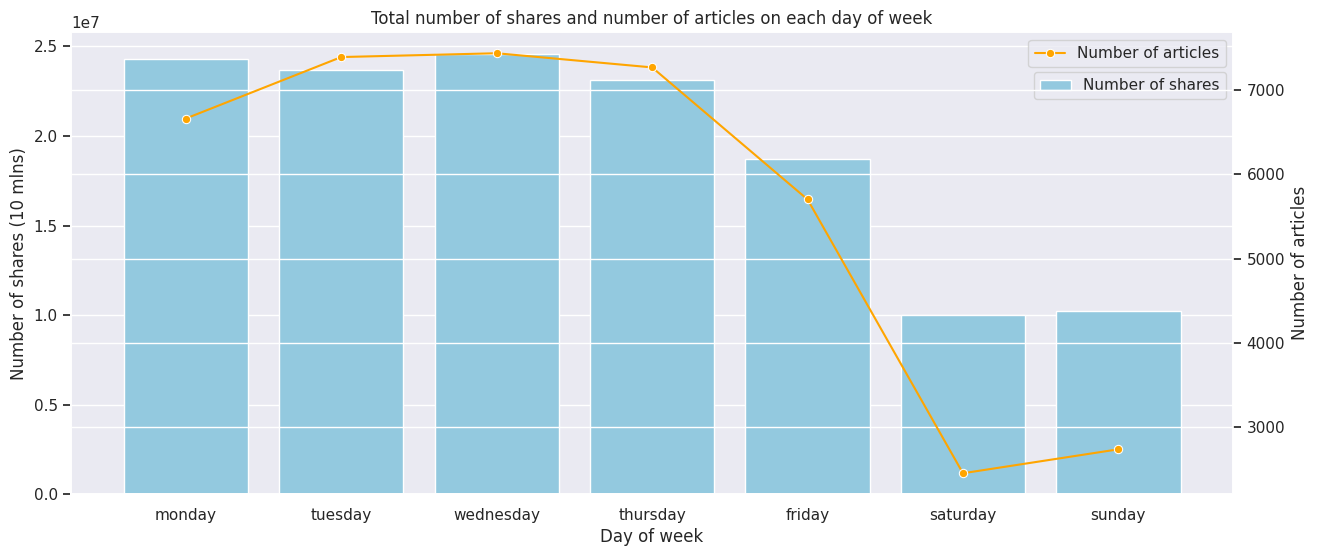

In [17]:
weekdays_lst = ['weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday', 'weekday_is_sunday', 'shares']
week = df[weekdays_lst]
weekdays_lst.pop()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    week.loc[:, 'weekday'] = ''
    for day in weekdays_lst:
      week.loc[week[day] == 1, 'weekday'] = day.split('_')[2]
    week = week.drop(columns = weekdays_lst)

def week_index(data):
  data = data.T
  data = data[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']]
  return data

day_articles = week['weekday'].value_counts().to_frame()
day_articles = week_index(day_articles)

day_shares = week.groupby('weekday')['shares'].sum().to_frame()
day_shares = week_index(day_shares)

plt.figure(figsize = (15, 6))

ax1 = sns.barplot(x = day_shares.columns, y = day_shares.values[0], color = 'skyblue', label = 'Number of shares')
ax2 = ax1.twinx()
sns.lineplot(x = day_articles.columns, y = day_articles.values[0], color = 'orange', ax=ax2, marker = 'o', label = 'Number of articles')
ax1.set_ylabel('Number of shares (10 mlns)')
ax2.set_ylabel('Number of articles')
ax1.set_xlabel('Day of week')
plt.title('Total number of shares and number of articles on each day of week')
ax1.legend(loc = 'upper right', bbox_to_anchor=(1, 0.93))
ax2.legend(loc = 'upper right', bbox_to_anchor=(1, 1));

We can see that most of the shares were made between monday and thursday and it is directly proportional to the change in the number of articles published. So, for now we can say that the day of the week has a strong influence on the number of shares.

*Media influence*

Working with the filtered by number of shares dataframe

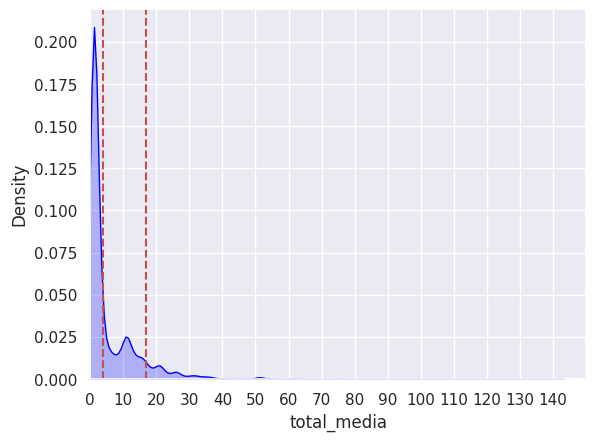

In [18]:
media = df_filter[['shares', 'num_imgs', 'num_videos']]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    media['total_media'] = df['num_imgs'] + df['num_videos']
sns.kdeplot(media['total_media'], fill = True, color = 'blue')
plt.xlim(0, 150)
plt.xticks(range(0, 150, 10))
plt.axvline(4, c ='r', linestyle = 'dashed')
plt.axvline(17, c ='r', linestyle = 'dashed');

Let's consider total_media as sum of the number of images and videos in an article. Also I decided to devide the number of total_media into 3 categroies:
*   Low: there are <=4 media files in an article
*   Medium: there are 5-17 media files in an article
*   High: there are >17 media files in an article





In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    media.loc[media['total_media'] <= 4, 'category'] = 'low'
    media.loc[(media['total_media'] > 4) & (media['total_media'] <= 17), 'category'] = 'medium'
    media.loc[media['total_media'] > 17, 'category'] = 'high'

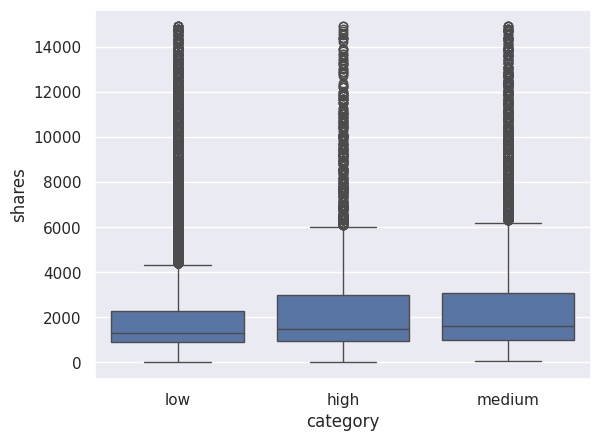

In [20]:
sns.boxplot(x = media['category'], y = media['shares']);

We can see that 'low' category has the least disperesed data, while medium has the most, but the difference among all of them is not critical. Meanwhile, 'low' category has the biggest number of outliners, but a big amount of them is the common tendency here. And finally, we can notice that each category shows almost the same kind of asymmetry.

*Pearson correlation*

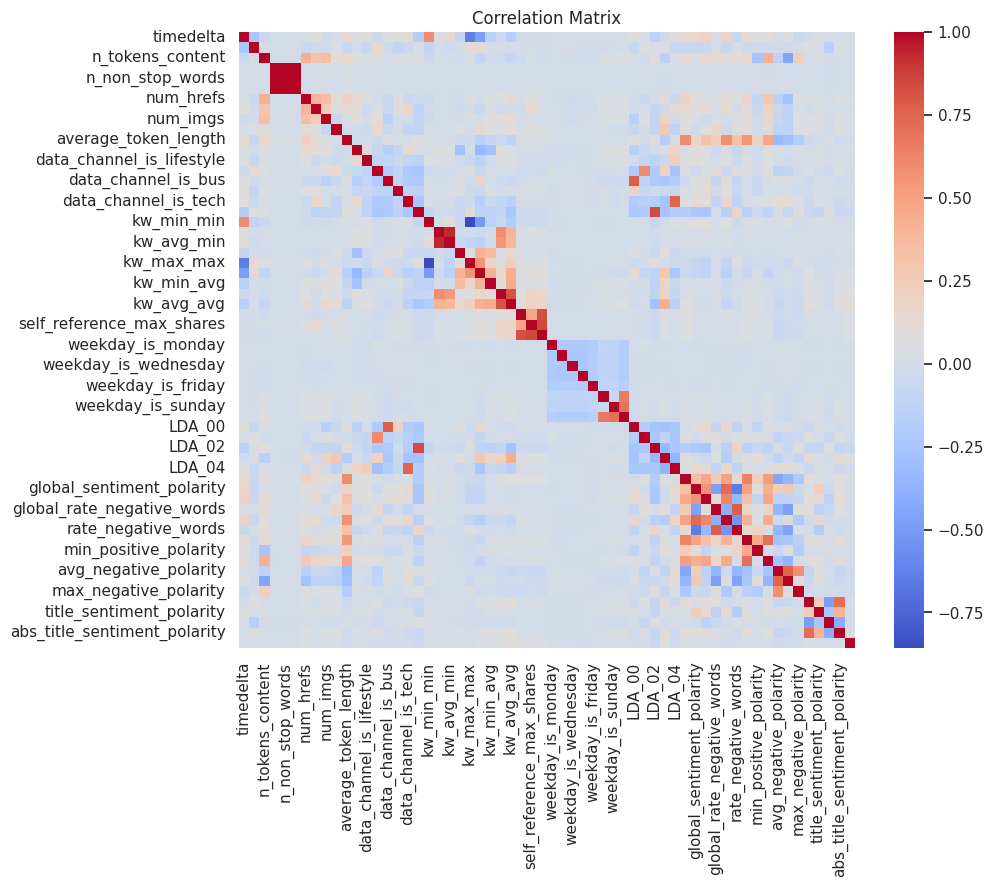

In [21]:
correlations = df.corr(method = 'pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

From Pearson correlation heatmap we can see that there are some variables that are strongly correlated, which means that they are linearly dependent on each other. We have to delete part of them to avoid multicollinearity and overfitting.

Let's drop columns kw_avg_min and kw_avg_avg due to their extremely strong correlation with some features

In [22]:
df = df.drop(columns = ['kw_avg_min', 'kw_avg_avg'], axis = 1)

##Random Forest Regression model

*MinMax Scaler*

I will scale all the columns of the dataframe using MinMaxScaler to make data more convenient

In [98]:
scaler = preprocessing.MinMaxScaler()
v = df.values
v_scaled = scaler.fit_transform(v)
df1 = pd.DataFrame(data = v_scaled, columns = df.columns)

y = df1['shares']
X = df1.drop('shares', axis = 1)

In [99]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

X_train_valid = scaler.fit_transform(X_train_valid)
X_test_valid = scaler.transform(X_test)

X_train, X_valid = train_test_split(X_train_valid, test_size = 0.3, random_state = 20)
y_train, y_valid = train_test_split(y_train_valid, test_size = 0.3, random_state = 20)

We splitted our data to train, validation and test sets and scaled features

Let's hypertune parameters such us min_samples_split and number of estimators to find best for our model

In [101]:
min_samples_split_lst = [2, 5, 10]
n_estimators_lst = list(range(10, 151, 20))
mse_valid_lst = []
mae_valid_lst = []
pairs = []

for split in min_samples_split_lst:
  for n in n_estimators_lst:
    model = RandomForestRegressor(random_state=20, min_samples_split = split, n_estimators = n)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_valid)

    mse_val = metrics.mean_squared_error(y_valid, y_pred_val)
    mae_val = metrics.mean_absolute_error(y_valid, y_pred_val)
    mse_valid_lst.append(mse_val)
    mae_valid_lst.append(mae_val)
    pairs.append((split, n))

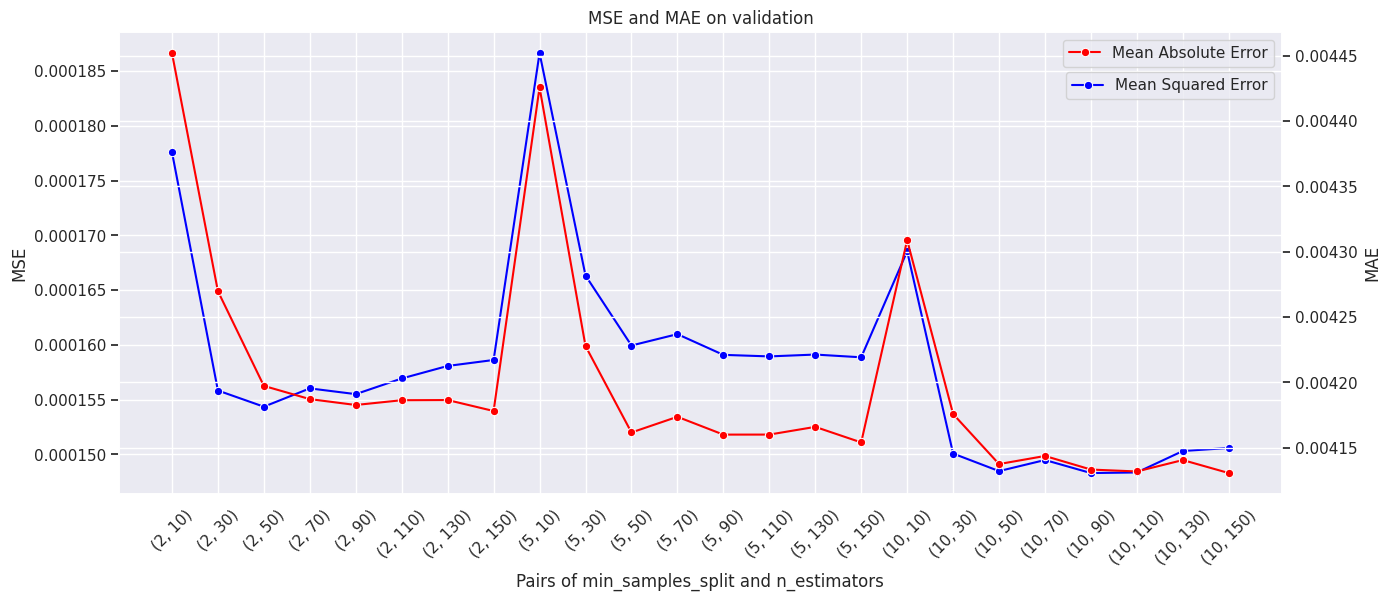

In [102]:
plt.figure(figsize = (15, 6))

ax1 = sns.lineplot(x = range(len(pairs)), y = mse_valid_lst, color = 'blue', marker = 'o', label = 'Mean Squared Error')
ax2 = ax1.twinx()
sns.lineplot(x = range(len(pairs)), y = mae_valid_lst, color = 'red', ax = ax2, marker = 'o', label = 'Mean Absolute Error')
ax1.set_xticks(range(len(mse_valid_lst)))

ax1.set_xticklabels(pairs, rotation = 45)
ax1.set_ylabel('MSE')
ax2.set_ylabel('MAE')
ax1.set_xlabel('Pairs of min_samples_split and n_estimators')
plt.title('MSE and MAE on validation for MinMax Scaler')
ax1.legend(loc = 'upper right', bbox_to_anchor=(1, 0.93))
ax2.legend(loc = 'upper right', bbox_to_anchor=(1, 1));

On the graph above can see that we achieve minimal MSE and MAE on the validation set using min_samples_split = 10 and number of estimators = 110. Further increase in these parameters may lead to overfitting. So, let's consider them as our best parameters.

In [106]:
mse_valid = mse_valid_lst[21]
mae_valid = mae_valid_lst[21]
print('Mean Squared Error on validation:', mse_valid)
print('Mean Absolute Error on validation:', mae_valid)

Mean Squared Error on validation: 0.00014835808092902492
Mean Absolute Error on validation: 0.00413166754329181


In [108]:
best_model = RandomForestRegressor(random_state=20, min_samples_split = 10, n_estimators = 110)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [113]:
mse_test = metrics.mean_squared_error(y_test, y_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error on test:', format(mse_test, ".10f"))
print('Mean Absolute Error on test:', format(mae_test, ".10f"))

Mean Squared Error on test: 0.0000890825
Mean Absolute Error on test: 0.0039535612


We can see that we have extremely small values of MSE and MAE, so that means that our model is doing pretty well.

Overall, we got a RandomForestRegressor model to predict number of articles' shares, its top MSE score is 0.00009 and top MAE is 0.004.